<a href="https://colab.research.google.com/github/Rafat97/rafat97-content-static/blob/main/Notebook/CSE4214_Pattern_Recognition_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Author info
<center>

| |  |
| ----------- | ----------- |
| ![Emdadul Haque Rafat](https://rafat97.github.io/static/c3688eb99d1fef50023a121e3abc5fa6/e8044/my-image.jpg)      | `Name:` Emdadul Haque<br /><br /> `Professional Status:` Student of Computer Science and Engineering <br /><br /> `Email:` rafathaque1997@gmail.com <br /><br /> `Website :` https://rafat97.github.io/ <br /><br />`Github:` https://github.com/Rafat97 <br /><br /> `Linkedin:` https://www.linkedin.com/in/rafat-haque-173131139/   |

</center>

In [1]:
!wget https://raw.githubusercontent.com/Rafat97/rafat97-content-static/main/random/train-perceptron.zip
!unzip -o train-perceptron.zip 

--2021-08-11 16:33:34--  https://raw.githubusercontent.com/Rafat97/rafat97-content-static/main/random/train-perceptron.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209 [application/zip]
Saving to: ‘train-perceptron.zip’

train-perceptron.zi 100%[===================>]     209  --.-KB/s    in 0s      

2021-08-11 16:33:34 (11.3 MB/s) - ‘train-perceptron.zip’ saved [209/209]

Archive:  train-perceptron.zip
  inflating: train-perceptron.txt    


In [2]:
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from matplotlib.font_manager import FontProperties



%matplotlib inline


In [3]:
train_path = "./train-perceptron.txt"

df_train = pd.read_csv(train_path, sep = " " ,names=["f_1","f_2","class"])
df_train

,f_1,f_2,class
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [4]:
train_c1 = df_train[df_train['class'] == 1]
train_c2 = df_train[df_train['class'] == 2]

In [5]:
train_c2

,f_1,f_2,class
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2


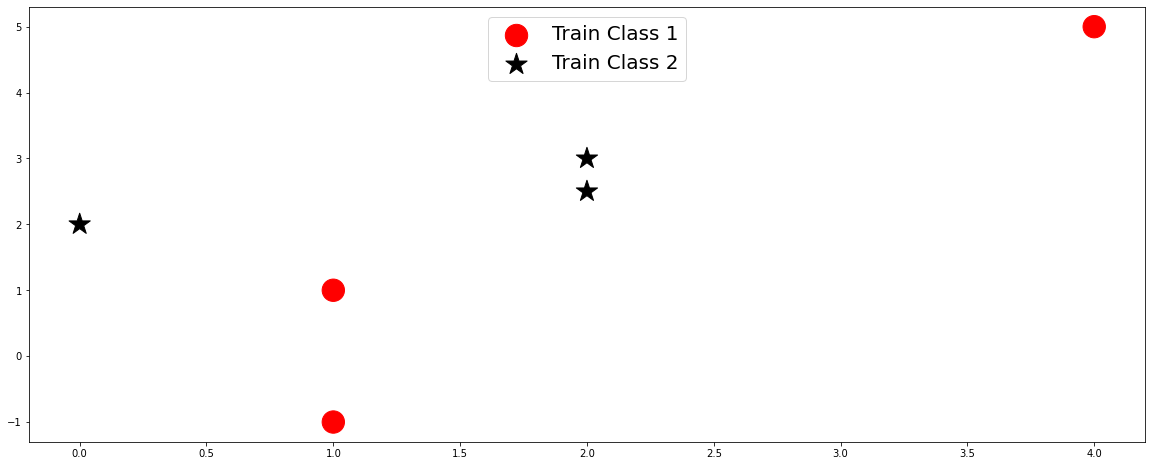

In [6]:
s = [500 for n in range(len(train_c1))]
s2 = [500 for n in range(len(train_c2))]
plt.figure(figsize=(20,8))
plt.scatter(train_c1['f_1'], train_c1['f_2'], marker = 'o',s=s, color = 'red', label = 'Train Class 1')
plt.scatter(train_c2['f_1'], train_c2['f_2'],  marker = '*',s=s2, color = 'black', label = 'Train Class 2')
plt.legend(prop={'size':20},loc=9)
plt.savefig("1_train.jpg")
plt.show()

# Equation
<center>

image.png

</center>

In [7]:
def equationValOfY(x1,x2):
  return [x1**2 , x2**2, x1*x2, x1, x2, 1]

W_c1 = []
W_c2 = []

for index, val in train_c1.iterrows():
  dta = equationValOfY(val.f_1,val.f_2)
  W_c1.append(dta)

for index, val in train_c2.iterrows():
  dta = equationValOfY(val.f_1,val.f_2)
  W_c2.append(dta)

W_c1 = np.array(W_c1)
W_c2 = np.array(W_c2)

print("W1")
print(W_c1)
print("W2")
print(W_c2)

W1
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1. -1.  1.]
 [16. 25. 20.  4.  5.  1.]]
W2
[[4.   6.25 5.   2.   2.5  1.  ]
 [0.   4.   0.   0.   2.   1.  ]
 [4.   9.   6.   2.   3.   1.  ]]


In [8]:
# normalization
W_c2 = W_c2 * -1

print("W1")
print(W_c1)
print("W2")
print(W_c2)

## concate both W1 and w2
print("\n\nconcate W1 and W2")
all_W = np.concatenate((W_c1,W_c2))
all_W

W1
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1. -1.  1.]
 [16. 25. 20.  4.  5.  1.]]
W2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


concate W1 and W2


array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

# Initial Weight value is `1`

In [9]:
df_Weight_value_is_one = pd.DataFrame()
df_Weight_value_is_one['learning_rate'] = [i/10 for i in range(1,11)]

## Many at a time

In [10]:
## many at a time

many_time_all_ittr = []
many_time_all_weight = []

for lr in df_Weight_value_is_one['learning_rate']:
  
  learning_rate = lr 

  W0_initWeight = np.ones((1,all_W.shape[0])) #init weight all `1`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      not_match_Y = np.array(temp_f)
      sum_Y = sum(not_match_Y)
      W0_initWeight = W0_initWeight + learning_rate * sum_Y

    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  many_time_all_ittr.append(ittr)
  many_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_one['many_at_a_time_ittr'] = many_time_all_ittr
df_Weight_value_is_one['many_at_a_time_weight'] = many_time_all_weight

0.1 [ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ] 102

0.2 [ 13.    -8.85   5.6   -1.   -10.9    2.4 ] 104

0.3 [ 17.8   -11.825   7.9    -1.4   -15.05    2.8  ] 91

0.4 [ 26.6 -18.   11.4  -2.2 -22.6   5.4] 116

0.5 [ 32.5   -22.125  14.     -2.5   -27.25    6.   ] 105

0.6 [ 40.  -26.9  17.2  -3.2 -33.8   8.2] 114

0.7 [ 41.6   -27.525  18.5    -3.2   -35.05    6.6  ] 91

0.8 [ 47.4 -31.6  21.   -3.8 -40.2   7.4] 91

0.9 [ 57.7  -38.15  25.3   -5.3  -49.4   10.  ] 105

1.0 [ 60.   -38.75  25.    -4.   -51.5   10.  ] 93



## One at a time

In [11]:
## One at a time
one_time_all_ittr = []
one_time_all_weight = []

for lr in df_Weight_value_is_one['learning_rate']:
  
  learning_rate = lr

  W0_initWeight = np.ones((1,all_W.shape[0])) #init weight all `1`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        W0_initWeight = W0_initWeight + learning_rate * dta
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      pass
      # not_match_Y = np.array(temp_f)
      # sum_Y = sum(not_match_Y)
    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  one_time_all_ittr.append(ittr)
  one_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_one['one_at_a_time_ittr'] = one_time_all_ittr
df_Weight_value_is_one['one_at_a_time_weight'] = one_time_all_weight

0.1 [ 1.    -1.025  0.7    0.2   -0.75   0.1  ] 6

0.2 [10.  -6.7  4.4 -1.2 -9.4  3.2] 92

0.3 [ 16.3 -10.7   6.7  -2.3 -15.2   5.5] 104

0.4 [ 22.2 -14.3   9.8  -2.6 -20.4   7.4] 106

0.5 [ 25.   -16.75  11.    -3.   -23.5    8.  ] 93

0.6 [ 29.2 -18.5  12.4  -4.4 -27.8   9.4] 93

0.7 [ 38.8   -25.075  17.1    -4.6   -35.75   12.9  ] 108

0.8 [ 45.8 -31.2  19.4  -5.4 -42.6  16.2] 115

0.9 [ 45.1  -30.05  19.9   -5.3  -42.2   14.5 ] 94

1.0 [ 50.  -33.5  22.   -6.  -47.   16. ] 94



In [12]:
df_Weight_value_is_one.to_csv("Weight_value_is_one.csv")
df_Weight_value_is_one

,learning_rate,many_at_a_time_ittr,many_at_a_time_weight,one_at_a_time_ittr,one_at_a_time_weight
0,0.1,102,"6.499999999999997,-4.425000000000002,2.8000000...",6,"1.0000000000000004,-1.0250000000000001,0.69999..."
1,0.2,104,"12.999999999999996,-8.850000000000003,5.600000...",92,"9.999999999999982,-6.699999999999988,4.4000000..."
2,0.3,91,"17.80000000000001,-11.824999999999987,7.899999...",104,"16.30000000000008,-10.699999999999982,6.699999..."
3,0.4,116,"26.59999999999999,-18.000000000000004,11.40000...",106,"22.199999999999932,-14.29999999999997,9.800000..."
4,0.5,105,"32.5,-22.125,14.0,-2.5,-27.25,6.0",93,"25.0,-16.75,11.0,-3.0,-23.5,8.0"
5,0.6,114,"40.00000000000004,-26.899999999999967,17.19999...",93,"29.200000000000117,-18.499999999999982,12.3999..."
6,0.7,91,"41.59999999999999,-27.525000000000016,18.49999...",108,"38.80000000000001,-25.07500000000005,17.099999..."
7,0.8,91,"47.400000000000006,-31.599999999999984,21.0000...",115,"45.799999999999855,-31.19999999999994,19.40000..."
8,0.9,105,"57.69999999999988,-38.15000000000001,25.299999...",94,"45.09999999999982,-30.050000000000054,19.89999..."
9,1.0,93,"60.0,-38.75,25.0,-4.0,-51.5,10.0",94,"50.0,-33.5,22.0,-6.0,-47.0,16.0"


## Plotting

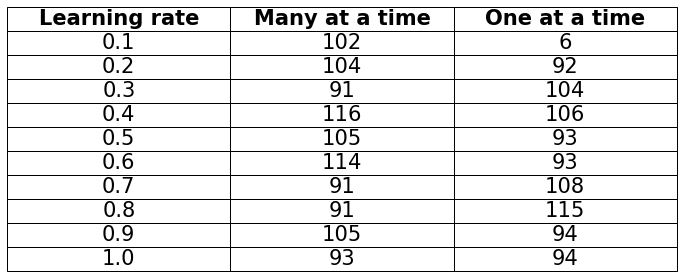

In [13]:
col_labels = ['Learning rate', 'Many at a time', 'One at a time']
table_vals = []

for index,val in df_Weight_value_is_one.iterrows():
  table_vals.append([val.learning_rate, val.many_at_a_time_ittr , val.one_at_a_time_ittr])

table = plt.table(cellText=table_vals,
                      colLabels=col_labels,
                      cellLoc = 'center', loc = 'center')


for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))


table.set_fontsize(25)
table.scale(2,2)
plt.axis('off')
plt.show()

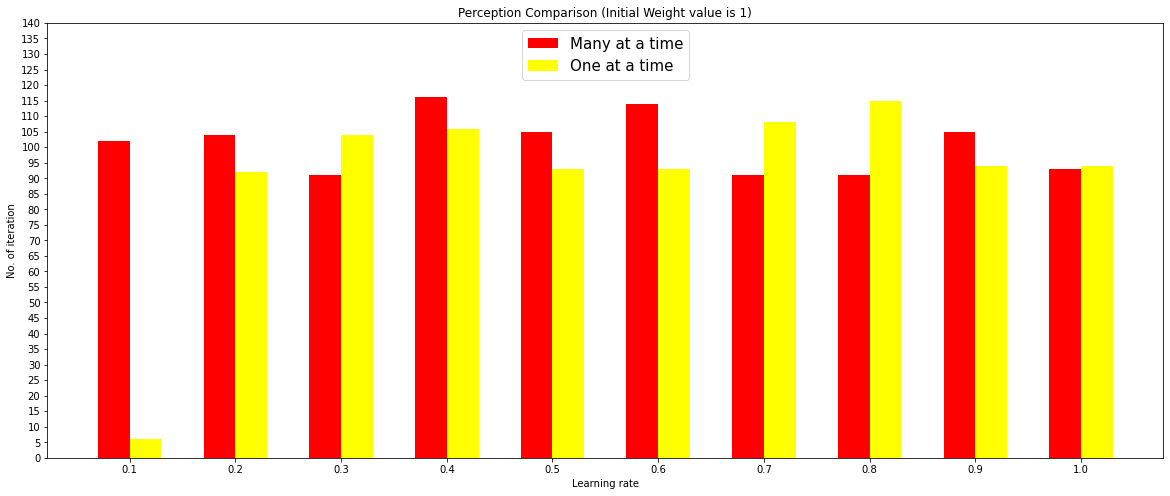

In [14]:
bar_width = 0.03
plt.figure(figsize=(20,8))
plt.title(f"Perception Comparison (Initial Weight value is 1)")
plt.bar(df_Weight_value_is_one.learning_rate - bar_width/2.0, df_Weight_value_is_one.many_at_a_time_ittr, color='red', width=bar_width, label = 'Many at a time')
plt.bar(df_Weight_value_is_one.learning_rate + bar_width/2.0, df_Weight_value_is_one.one_at_a_time_ittr, color='yellow', width=bar_width, label = 'One at a time')
plt.xticks(df_Weight_value_is_one.learning_rate) 
plt.yticks(np.arange(0, max(df_Weight_value_is_one.many_at_a_time_ittr) + 25, 5)) 
plt.xlabel("Learning rate")
plt.ylabel("No. of iteration")
plt.legend(prop={'size':15},loc=9)
plt.savefig("Initial_weight_set_zeros.jpg")
plt.show()

# Initial Weight value is `0`

In [15]:
df_Weight_value_is_zero = pd.DataFrame()
df_Weight_value_is_zero['learning_rate'] = [i/10 for i in range(1,11)]

## Many at a time

In [16]:
## many at a time

many_time_all_ittr = []
many_time_all_weight = []

for lr in df_Weight_value_is_zero['learning_rate']:
  
  learning_rate = lr 

  W0_initWeight = np.zeros((1,all_W.shape[0])) #init weight all `0`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      not_match_Y = np.array(temp_f)
      sum_Y = sum(not_match_Y)
      W0_initWeight = W0_initWeight + learning_rate * sum_Y

    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  many_time_all_ittr.append(ittr)
  many_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_zero['many_at_a_time_ittr'] = many_time_all_ittr
df_Weight_value_is_zero['many_at_a_time_weight'] = many_time_all_weight

0.1 [ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ] 105

0.2 [ 13.    -8.85   5.6   -1.   -10.9    2.4 ] 105

0.3 [ 19.5   -13.275   8.4    -1.5   -16.35    3.6  ] 105

0.4 [ 26.  -17.7  11.2  -2.  -21.8   4.8] 105

0.5 [ 30.    -19.375  12.5    -2.    -25.75    5.   ] 92

0.6 [ 39.   -26.55  16.8   -3.   -32.7    7.2 ] 105

0.7 [ 42.    -27.125  17.5    -2.8   -36.05    7.   ] 92

0.8 [ 52.  -35.4  22.4  -4.  -43.6   9.6] 105

0.9 [ 58.5   -39.825  25.2    -4.5   -49.05   10.8  ] 105

1.0 [ 60.   -38.75  25.    -4.   -51.5   10.  ] 92



## One at a time

In [17]:
## One at a time
one_time_all_ittr = []
one_time_all_weight = []

for lr in df_Weight_value_is_zero['learning_rate']:
  
  learning_rate = lr

  W0_initWeight = np.zeros((1,all_W.shape[0])) #init weight all `0`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        W0_initWeight = W0_initWeight + learning_rate * dta
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      pass
      # not_match_Y = np.array(temp_f)
      # sum_Y = sum(not_match_Y)
    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  one_time_all_ittr.append(ittr)
  one_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_zero['one_at_a_time_ittr'] = one_time_all_ittr
df_Weight_value_is_zero['one_at_a_time_weight'] = one_time_all_weight

0.1 [ 5.   -3.35  2.2  -0.6  -4.7   1.6 ] 94

0.2 [10.  -6.7  4.4 -1.2 -9.4  3.2] 94

0.3 [ 15.   -10.05   6.6   -1.8  -14.1    4.8 ] 94

0.4 [ 20.  -13.4   8.8  -2.4 -18.8   6.4] 94

0.5 [ 25.   -16.75  11.    -3.   -23.5    8.  ] 94

0.6 [ 30.  -20.1  13.2  -3.6 -28.2   9.6] 94

0.7 [ 35.   -23.45  15.4   -4.2  -32.9   11.2 ] 94

0.8 [ 40.  -26.8  17.6  -4.8 -37.6  12.8] 94

0.9 [ 45.   -30.15  19.8   -5.4  -42.3   14.4 ] 94

1.0 [ 50.  -33.5  22.   -6.  -47.   16. ] 94



In [18]:
df_Weight_value_is_zero.to_csv("./Weight_value_is_zero.csv")
df_Weight_value_is_zero

,learning_rate,many_at_a_time_ittr,many_at_a_time_weight,one_at_a_time_ittr,one_at_a_time_weight
0,0.1,105,"6.499999999999998,-4.425000000000001,2.8000000...",94,"4.999999999999991,-3.349999999999994,2.2000000..."
1,0.2,105,"12.999999999999996,-8.850000000000001,5.600000...",94,"9.999999999999982,-6.699999999999988,4.4000000..."
2,0.3,105,"19.50000000000002,-13.274999999999983,8.399999...",94,"15.000000000000064,-10.049999999999986,6.59999..."
3,0.4,105,"25.999999999999993,-17.700000000000003,11.2000...",94,"19.999999999999964,-13.399999999999975,8.80000..."
4,0.5,92,"30.0,-19.375,12.5,-2.0,-25.75,5.0",94,"25.0,-16.75,11.0,-3.0,-23.5,8.0"
5,0.6,105,"39.00000000000004,-26.549999999999965,16.79999...",94,"30.000000000000128,-20.099999999999973,13.1999..."
6,0.7,92,"42.0,-27.125000000000018,17.499999999999975,-2...",94,"34.999999999999986,-23.45000000000004,15.39999..."
7,0.8,105,"51.999999999999986,-35.400000000000006,22.4000...",94,"39.99999999999993,-26.79999999999995,17.600000..."
8,0.9,105,"58.49999999999986,-39.82500000000002,25.199999...",94,"44.999999999999815,-30.150000000000055,19.7999..."
9,1.0,92,"60.0,-38.75,25.0,-4.0,-51.5,10.0",94,"50.0,-33.5,22.0,-6.0,-47.0,16.0"


## Plotting

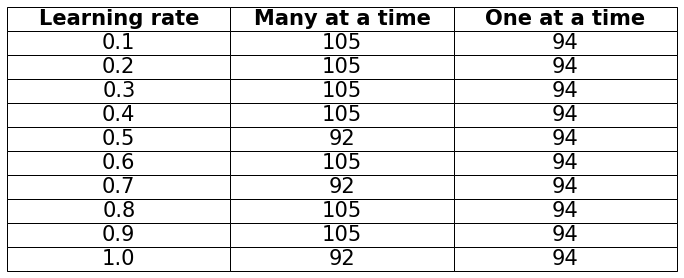

In [19]:
col_labels = ['Learning rate', 'Many at a time', 'One at a time']
table_vals = []

for index,val in df_Weight_value_is_zero.iterrows():
  table_vals.append([val.learning_rate, val.many_at_a_time_ittr , val.one_at_a_time_ittr])

table = plt.table(cellText=table_vals,
                      colLabels=col_labels,
                      cellLoc = 'center', loc = 'center')


for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))


table.set_fontsize(25)
table.scale(2,2)
plt.axis('off')
plt.show()

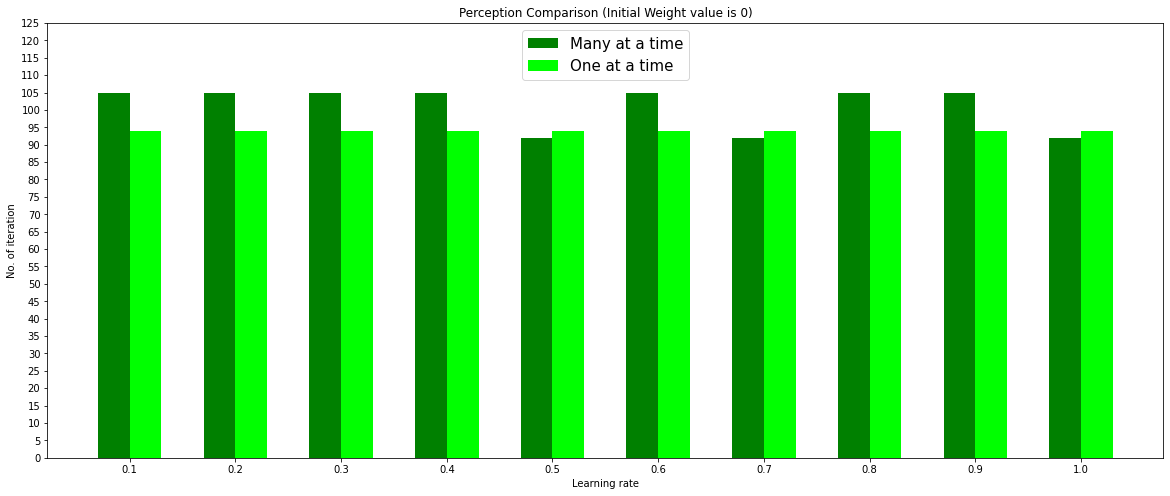

In [20]:
bar_width = 0.03
plt.figure(figsize=(20,8))
plt.title(f"Perception Comparison (Initial Weight value is 0)")
plt.bar(df_Weight_value_is_zero.learning_rate - bar_width/2.0, df_Weight_value_is_zero.many_at_a_time_ittr, color='green', width=bar_width, label = 'Many at a time')
plt.bar(df_Weight_value_is_zero.learning_rate + bar_width/2.0, df_Weight_value_is_zero.one_at_a_time_ittr, color='lime', width=bar_width, label = 'One at a time')
plt.xticks(df_Weight_value_is_zero.learning_rate) 
plt.yticks(np.arange(0, max(df_Weight_value_is_zero.many_at_a_time_ittr) + 25, 5)) 
plt.xlabel("Learning rate")
plt.ylabel("No. of iteration")
plt.legend(prop={'size':15},loc=9)
plt.savefig("Initial_weight_set_ones.jpg")
plt.show()

# Initial Weight value is `random`

In [21]:
df_Weight_value_is_random = pd.DataFrame()
df_Weight_value_is_random['learning_rate'] = [i/10 for i in range(1,11)]

## Many at a time

In [22]:
## many at a time

many_time_all_ittr = []
many_time_all_weight = []

for lr in df_Weight_value_is_random['learning_rate']:
  
  learning_rate = lr 

  np.random.seed(101)
  W0_initWeight = np.random.random((1,all_W.shape[0])) #init weight all `random`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      not_match_Y = np.array(temp_f)
      sum_Y = sum(not_match_Y)
      W0_initWeight = W0_initWeight + learning_rate * sum_Y

    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  many_time_all_ittr.append(ittr)
  many_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_random['many_at_a_time_ittr'] = many_time_all_ittr
df_Weight_value_is_random['many_at_a_time_weight'] = many_time_all_weight

0.1 [ 6.71639863 -4.27933241  2.82847423 -1.02847834 -5.51472302  1.33389686] 111

0.2 [ 13.11639863  -8.22933241   5.42847423  -1.62847834 -10.91472302
   2.23389686] 98

0.3 [ 17.91639863 -11.65433241   7.52847423  -1.62847834 -14.76472302
   3.23389686] 91

0.4 [ 28.11639863 -18.62933241  11.62847423  -2.62847834 -23.31472302
   6.03389686] 121

0.5 [ 37.01639863 -23.92933241  15.52847423  -4.32847834 -31.81472302
   7.83389686] 139

0.6 [ 40.11639863 -26.72933241  16.82847423  -3.42847834 -33.51472302
   8.63389686] 116

0.7 [ 48.81639863 -31.10433241  19.62847423  -4.72847834 -42.36472302
   9.93389686] 124

0.8 [ 59.71639863 -37.82933241  24.02847423  -6.22847834 -52.11472302
  12.83389686] 139

0.9 [ 67.11639863 -42.62933241  27.02847423  -7.02847834 -58.71472302
  14.33389686] 138

1.0 [ 77.51639863 -49.42933241  31.02847423  -6.82847834 -66.31472302
  18.83389686] 149



## One at a time

In [23]:
## One at a time
one_time_all_ittr = []
one_time_all_weight = []

for lr in df_Weight_value_is_random['learning_rate']:
  
  learning_rate = lr

  np.random.seed(101)
  W0_initWeight = np.random.random((1,all_W.shape[0])) #init weight all `random`

  ittr = 1;

  while(True):
    numberOfMisClassified = 0
    temp_f = []

    for dta in all_W:
      multiply = np.dot(dta,W0_initWeight.T)

      if multiply <= 0:
        numberOfMisClassified += 1
        W0_initWeight = W0_initWeight + learning_rate * dta
        temp_f.append(dta.tolist())
        pass

    if numberOfMisClassified != 0:
      pass
      # not_match_Y = np.array(temp_f)
      # sum_Y = sum(not_match_Y)
    else:
      temp_f = []
      break; 

    ittr += 1

  print(learning_rate , W0_initWeight[-1,:], ittr)
  print()
  one_time_all_ittr.append(ittr)
  one_time_all_weight.append(','.join(map(str, W0_initWeight[-1,:]))  ) 


df_Weight_value_is_random['one_at_a_time_ittr'] = one_time_all_ittr
df_Weight_value_is_random['one_at_a_time_weight'] = one_time_all_weight

0.1 [ 5.71639863 -3.80433241  2.32847423 -1.02847834 -4.96472302  1.93389686] 104

0.2 [10.51639863 -6.67933241  4.62847423 -1.82847834 -9.41472302  3.43389686] 99

0.3 [ 15.81639863 -10.00433241   6.62847423  -2.52847834 -14.76472302
   5.03389686] 100

0.4 [ 20.11639863 -13.22933241   8.42847423  -2.62847834 -18.51472302
   6.83389686] 95

0.5 [ 26.51639863 -16.55433241  11.52847423  -3.82847834 -24.56472302
   8.33389686] 98

0.6 [ 32.91639863 -21.77933241  13.82847423  -4.62847834 -30.81472302
  11.03389686] 106

0.7 [ 38.31639863 -25.50433241  16.12847423  -5.42847834 -36.06472302
  12.73389686] 107

0.8 [ 38.11639863 -24.62933241  16.82847423  -5.42847834 -36.11472302
  11.23389686] 89

0.9 [ 47.31639863 -30.25433241  20.72847423  -7.02847834 -44.76472302
  14.33389686] 101

1.0 [ 52.51639863 -33.67933241  23.02847423  -7.82847834 -49.81472302
  15.83389686] 101



In [24]:
df_Weight_value_is_random

,learning_rate,many_at_a_time_ittr,many_at_a_time_weight,one_at_a_time_ittr,one_at_a_time_weight
0,0.1,111,"6.716398627702442,-4.27933241313186,2.82847422...",104,"5.716398627702425,-3.8043324131318528,2.328474..."
1,0.2,98,"13.11639862770245,-8.229332413131859,5.4284742...",99,"10.516398627702426,-6.679332413131849,4.628474..."
2,0.3,91,"17.91639862770246,-11.654332413131847,7.528474...",100,"15.816398627702522,-10.004332413131845,6.62847..."
3,0.4,121,"28.116398627702427,-18.62933241313187,11.62847...",95,"20.11639862770241,-13.229332413131834,8.428474..."
4,0.5,139,"37.01639862770244,-23.92933241313186,15.528474...",98,"26.516398627702447,-16.55433241313186,11.52847..."
5,0.6,116,"40.116398627702495,-26.729332413131825,16.8284...",106,"32.91639862770261,-21.779332413131826,13.82847..."
6,0.7,124,"48.81639862770249,-31.104332413131893,19.62847...",107,"38.31639862770247,-25.504332413131912,16.12847..."
7,0.8,139,"59.71639862770237,-37.82933241313189,24.028474...",89,"38.11639862770241,-24.629332413131813,16.82847..."
8,0.9,138,"67.11639862770235,-42.62933241313188,27.028474...",101,"47.31639862770225,-30.25433241313192,20.728474..."
9,1.0,149,"77.51639862770244,-49.42933241313186,31.028474...",101,"52.51639862770244,-33.67933241313186,23.028474..."


## Plotting

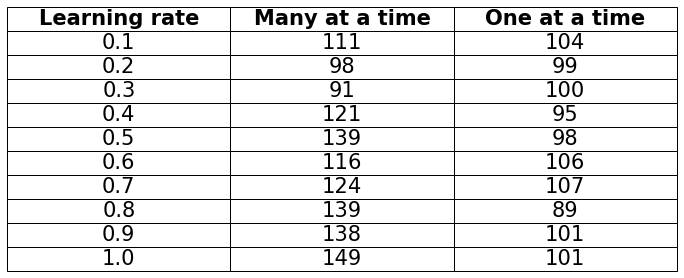

In [25]:
col_labels = ['Learning rate', 'Many at a time', 'One at a time']
table_vals = []

for index,val in df_Weight_value_is_random.iterrows():
  table_vals.append([val.learning_rate, val.many_at_a_time_ittr , val.one_at_a_time_ittr])

table = plt.table(cellText=table_vals,
                      colLabels=col_labels,
                      cellLoc = 'center', loc = 'center')


for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))


table.set_fontsize(25)
table.scale(2,2)
plt.axis('off')
plt.show()

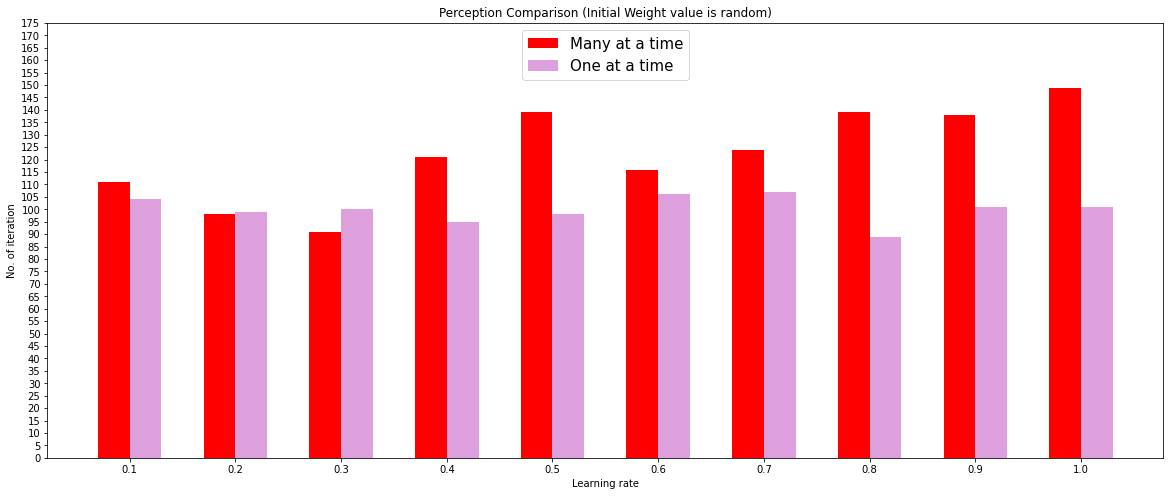

In [26]:
bar_width = 0.03
plt.figure(figsize=(20,8))
plt.title(f"Perception Comparison (Initial Weight value is random)")
plt.bar(df_Weight_value_is_random.learning_rate - bar_width/2.0, df_Weight_value_is_random.many_at_a_time_ittr, color='red', width=bar_width, label = 'Many at a time')
plt.bar(df_Weight_value_is_random.learning_rate + bar_width/2.0, df_Weight_value_is_random.one_at_a_time_ittr, color='plum', width=bar_width, label = 'One at a time')
plt.xticks(df_Weight_value_is_random.learning_rate) 
plt.yticks(np.arange(0, max(df_Weight_value_is_random.many_at_a_time_ittr) + 30, 5)) 
plt.xlabel("Learning rate")
plt.ylabel("No. of iteration")
plt.legend(prop={'size':15},loc=9)
plt.savefig("Initial_weight_set_rendom.jpg")
plt.show()

# Question

#### **Q1.** In task 2, why do we need to take the sample points to a high dimension?

**Answer:** From the data we saw that , it was not linearly seperable betweem t classes. So, we had to create a hyperplane to differentiate the two classes easily. that's why we need to take the to higher dimantation.



#### **Q2.** In each of the three initial weight cases and for each learning rate, how many updates does the algorithm take before converging?

**Answer:** Three initial weight cases and for each learning rate, The  converging are given bellow - 

When initial weight is `0` -

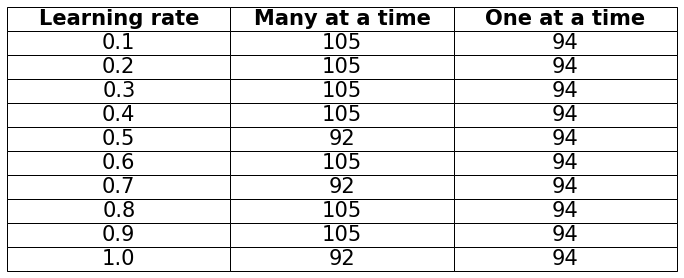

When initial weight is `1` -


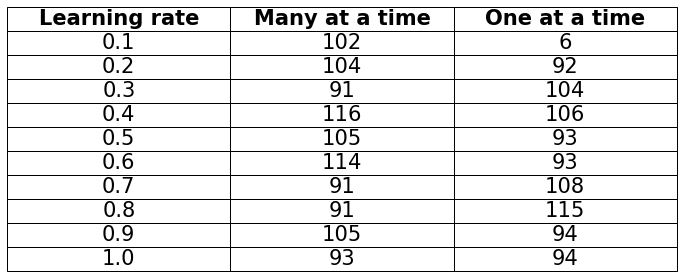


When initial weight is `random` -

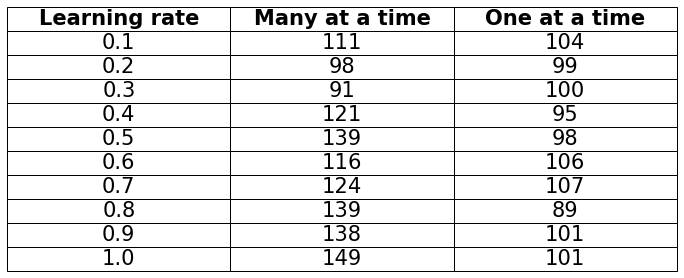


# <center> Thank you </center>